<a href="https://colab.research.google.com/github/Saani765/summer-of-code-2023/blob/main/SOC'23_week_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Data Collection done from : https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge

In [3]:
data=pd.read_csv("train.csv")
data.head()


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
data.shape

(29451, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


**we checked that no value is null in any column :)**

In [7]:
# extract city from address which is the last word in the address column
data['ADDRESS'] = data['ADDRESS'].str.split(',').apply(lambda x: x[-1])
data['ADDRESS'].value_counts(ascending=False).head(25)

Bangalore        4340
Lalitpur         2993
Mumbai           2023
Pune             1991
Noida            1767
Kolkata          1709
Maharashtra      1579
Chennai          1255
Ghaziabad        1087
Jaipur            962
Chandigarh        696
Faridabad         649
Mohali            556
Vadodara          510
Gurgaon           430
Surat             423
Nagpur            336
Lucknow           327
Indore            306
Bhubaneswar       235
Bhopal            218
Kochi             205
Visakhapatnam     179
Bhiwadi           161
Goa               149
Name: ADDRESS, dtype: int64

we will try to map cities to different categories like big cities with better facilities in the premium range then tier 2 and then tier 3 using data from google

In [10]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly',
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City',
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode',
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati',
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur',
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode',
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad',
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj',
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri',
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli',
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam',
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'

data['CITY_TIER'] = data['ADDRESS'].apply(map_city)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
 12  city_tier              29451 non-null  object 
 13  CITY_TIER              29451 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 3.1+ 

**Exploratory Data Analysis (EDA)😁**

<Axes: xlabel='PRICE_IN_LACS', ylabel='Count'>

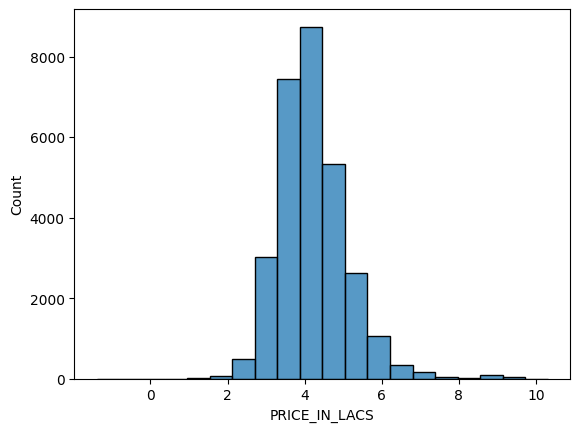

In [12]:
# checking target value distribution
data['PRICE_IN_LACS'] = np.log(data['TARGET(PRICE_IN_LACS)'])
sns.histplot(data['PRICE_IN_LACS'], bins=20)

<Axes: xlabel='area', ylabel='Count'>

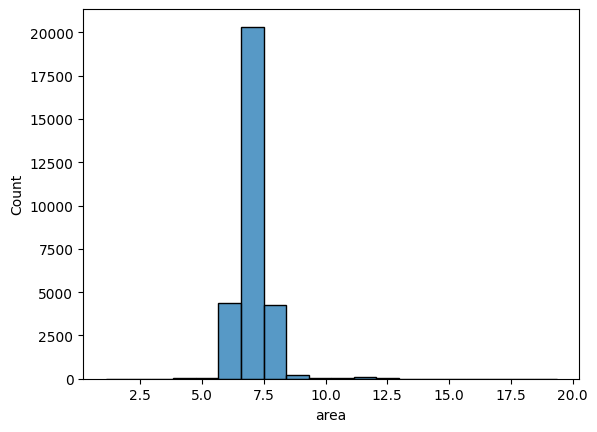

In [13]:
# taking log of square_ft as well
data['area'] = np.log(data['SQUARE_FT'])
sns.histplot(data['area'], bins=20)

In [15]:
data['PRICE_IN_LACS'].describe()

count    29451.000000
mean         4.210367
std          0.899434
min         -1.386294
25%          3.637586
50%          4.127134
75%          4.605170
max         10.308953
Name: PRICE_IN_LACS, dtype: float64

In [14]:
data['area'].describe()

count    29451.000000
mean         7.086932
std          0.593580
min          1.098612
25%          6.802418
50%          7.069072
75%          7.346454
max         19.354990
Name: area, dtype: float64

can see some outliers in both prices and sq ft area :(

In [16]:
def plot_numerical(feature):
    sns.lmplot(x=feature, y='TARGET(PRICE_IN_LACS)', data=data)
    plt.show()


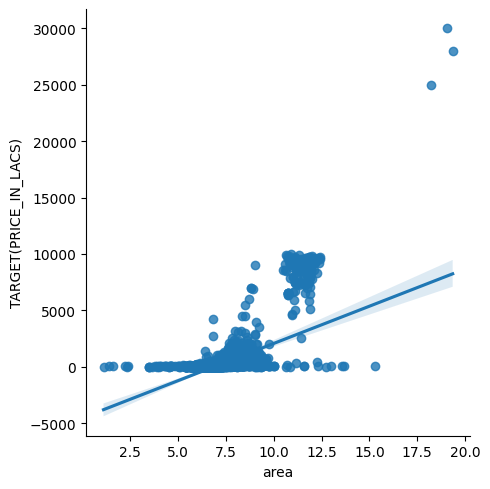

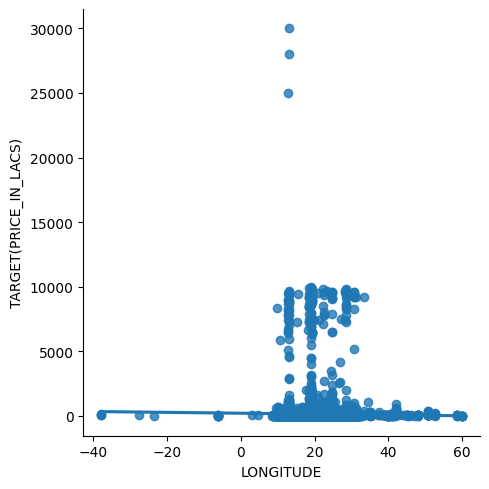

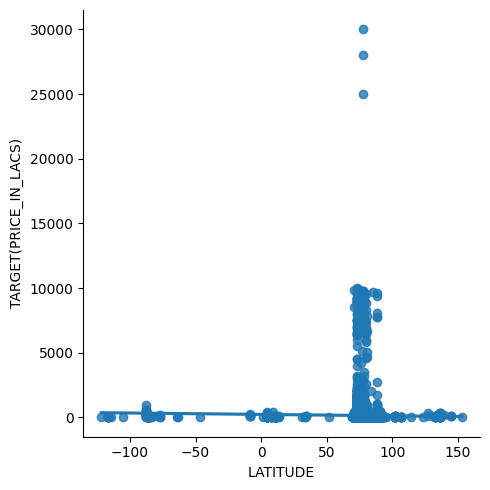

In [17]:
for feature in ['area', 'LONGITUDE', 'LATITUDE']:
    plot_numerical(feature)

seperating categorical and numerical features

In [18]:
categorical_features = ['POSTED_BY', 'BHK_OR_RK', 'city_tier', 'ADDRESS']
numerical_features = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'area']

In [ ]:
NumericData = data[['BHK_NO.', 'TARGET(PRICE_IN_LACS)', 'SQUARE_FT']]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

Encoding categorical features using OneHotEncoder and LabelEncoder

In [64]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical feature using LabelEncoder
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Create an instance of OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical features using OneHotEncoder
encoded_features = one_hot_encoder.fit_transform(data[categorical_features])

# Create new column names for the encoded features
feature_names = one_hot_encoder.get_feature_names_out(categorical_features)

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the encoded features with the original data
data_encoded = pd.concat([data.drop(categorical_features, axis=1), encoded_df], axis=1)

# Print the encoded DataFrame
data_encoded.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY_TIER,...,ADDRESS_246,ADDRESS_247,ADDRESS_248,ADDRESS_249,ADDRESS_250,ADDRESS_251,ADDRESS_252,ADDRESS_253,ADDRESS_254,ADDRESS_255
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,tier2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,tier2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df=data.copy()
df = df[numerical_features+['TARGET(PRICE_IN_LACS)', 'PRICE_IN_LACS']]
df = pd.concat([df, data_encoded], axis=1)
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,area,TARGET(PRICE_IN_LACS),...,ADDRESS_246,ADDRESS_247,ADDRESS_248,ADDRESS_249,ADDRESS_250,ADDRESS_251,ADDRESS_252,ADDRESS_253,ADDRESS_254,ADDRESS_255
0,0,0,2,1300.236407,1,1,12.969910,77.597960,7.170301,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,7.150701,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,6.838576,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,6.835100,62.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,2,999.009247,0,1,22.592200,88.484911,6.906764,60.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Training model**

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics, preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

In [ ]:
train_data = df.copy()
feature_cols = [feature for feature in train_data.columns if feature not in(['READY_TO_MOVE', 'ADDRESS', 'TARGET(PRICE_IN_LACS)',
                                                                             'SQUARE_FT', 'PRICE_IN_LACS','CITY_TIER','UNDER_CONSTRUCTION'])]
print('features used: ', feature_cols)



In [91]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0,
                                                    stratify=X[['RESALE', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0,
                                                    stratify=X[['RESALE', 'RERA']])

**Linear Regressor Model**

In [ ]:
print(X_train.dtypes)

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)


Mean Squared Error: 1706807062043.1636


Mean Squared Error: 1706807062043.1636 very huge


**Decision Tree Model**

In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create an instance of the DecisionTreeRegressor model
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Mean Squared Error: 0.17757895222176137
r2_score:  95.36


Mean Squared Error: 0.17757895222176137
r2_score:  95.36

In [ ]:
y_pred = model.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = model.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  201.64772714085203
RMSE Scaled Data:  0.13289622750391888
r2_score:  90.86
Validation metrics...
RMSE Actual:  278.45169832598395
RMSE Scaled Data:  0.33066062012131986
## r2_score:  79.53

**Random Forest Regressor Model**

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))


Mean Squared Error: 0.10970186853708211
r2_score:  75.49


Mean Squared Error: 0.10933644569901581
r2_score:  79.53

In [ ]:
y_pred = model.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = model.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  235.27409756349527
RMSE Scaled Data:  0.13287339023983155
r2_score:  87.55
Validation metrics...
RMSE Actual:  304.6721856676202
RMSE Scaled Data:  0.33121272399634966
## r2_score:  75.49